# Creates main dataframe for each domain/level of organization

Reads in various datasets and creates different dataframes ("raw" dataframe, "gene" dataframe, and "stats" dataframe) which are ultimately merged to create the "core" dataframe for each domain and level of organization. For each domain, the final dataframes contains information for each taxa/sample on:
- number of genes
- genome size
- number of compounds
- number of reactions
- number of ECs (both individual ECs and total ECs)
- fraction of each individual EC class 

*Metagenomes are wonky because of different file structure. Still working on this as of January 2020.*



In [5]:
import numpy as np
import pandas as pd
import glob
import os
import json
import scipy.stats as stats
from builtins import any
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
archaea_table = pd.read_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_JGItable.csv')
bacteria_table = pd.read_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_JGItable.csv')
eukarya_table = pd.read_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_JGItable.csv')
metagenome_table = pd.read_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Metagenomes/metagenome_JGItable.csv')

In [5]:
def create_gene_df(old_df):
    gene_df = old_df[['taxon_oid', 'Domain', 'Genome Size   * assembled', 'Gene Count   * assembled']].copy()
    gene_df = gene_df.rename(columns={'taxon_oid': 'Taxon ID', 'Genome Size   * assembled': 'Genome Size', 'Gene Count   * assembled': 'Gene Count'})
    gene_df = gene_df.set_index('Taxon ID')
    return gene_df

In [6]:
### create gene count and genome size dfs

archaea_gene_df = create_gene_df(archaea_table)
bacteria_gene_df = create_gene_df(bacteria_table)
eukarya_gene_df = create_gene_df(eukarya_table)
metagenome_gene_df = create_gene_df(metagenome_table)

In [7]:
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_cpd_dict.json', 'r') as f:
    archaea_cpd_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_rxn_dict.json', 'r') as f:
    archaea_rxn_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_num_ecs_dict.json', 'r') as f:
    archaea_num_ecs_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_ecparsed_dict.json', 'r') as f:
    archaea_ecparsed_dict = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_cpd_dict.json', 'r') as f:
    bacteria_cpd_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_rxn_dict.json', 'r') as f:
    bacteria_rxn_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_num_ecs_dict.json', 'r') as f:
    bacteria_num_ecs_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_ecparsed_dict.json', 'r') as f:
    bacteria_ecparsed_dict = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_cpd_dict.json', 'r') as f:
    eukarya_cpd_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_rxn_dict.json', 'r') as f:
    eukarya_rxn_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_num_ecs_dict.json', 'r') as f:
    eukarya_num_ecs_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_ecparsed_dict.json', 'r') as f:
    eukarya_ecparsed_dict = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Metagenomes/metagenome_cpd_dict.json', 'r') as f:
    metagenome_cpd_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Metagenomes/metagenome_rxn_dict.json', 'r') as f:
    metagenome_rxn_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Metagenomes/metagenome_num_ecs_dict.json', 'r') as f:
    metagenome_num_ecs_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Metagenomes/metagenome_ecparsed_dict.json', 'r') as f:
    metagenome_ecparsed_dict = json.load(f)
    
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_stats_list.json', 'r') as f:
    archaea_stats_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_stats_list.json', 'r') as f:
    bacteria_stats_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_stats_list.json', 'r') as f:
    eukarya_stats_dict = json.load(f)
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Metagenomes/metagenome_stats_list.json', 'r') as f:
    metagenome_stats_dict = json.load(f)
    

In [9]:
def merge_dfs(gene_df, cpd_dict, rxn_dict, ecparsed_dict):
    parsed_df = pd.DataFrame(ecparsed_dict).T ### create df from parsed EC dictionary
    parsed_df.index.name = 'Taxon ID' ### set Taxon ID as index
    combo_dict = [cpd_dict, rxn_dict] ### create list for next line
    combo_df = pd.DataFrame(combo_dict).T ### create df from the rxn and cpd dicts
    combo_df.columns = ['#cpds', '#rxns'] ### set column names for above df
    combo_df.index.name = 'Taxon ID' ### set Taxon ID as index
    combo_df = combo_df.reset_index() ### reset index
    gene_df = gene_df.reset_index() ### reset index
    gene_df['Taxon ID'] = gene_df['Taxon ID'].astype(str) ### needed for merge to work
    core_df = pd.merge(gene_df, combo_df)  ### merge
    core_df = core_df.set_index('Taxon ID') ### set index as Taxon ID column
    core_df = core_df.merge(parsed_df, left_index=True, right_index=True) ### merge with parsed df...requires left_index arguments
    return core_df

In [11]:
archaea_df = merge_dfs(archaea_gene_df, archaea_cpd_dict, archaea_rxn_dict, archaea_ecparsed_dict)
bacteria_df = merge_dfs(bacteria_gene_df, bacteria_cpd_dict, bacteria_rxn_dict, bacteria_ecparsed_dict)
eukarya_df = merge_dfs(eukarya_gene_df, eukarya_cpd_dict, eukarya_rxn_dict, eukarya_ecparsed_dict)
metagenome_df = merge_dfs(metagenome_gene_df, metagenome_cpd_dict, metagenome_rxn_dict, metagenome_ecparsed_dict)

In [12]:
metagenome_stats_dict_clean = {}
for k,v in metagenome_stats_dict.items():
    if 'unassembled' not in v.keys():
        for i,j in v.items():
            metagenome_stats_dict_clean[k] = j

In [13]:
raw_df = pd.DataFrame.from_dict(metagenome_stats_dict_clean, orient='index')
raw_df.head()

,Number of sequences,Number of bases,GC count,CRISPR Count,Genes,RNA genes,rRNA genes,5S rRNA,16S rRNA,18S rRNA,...,COG Clusters,Pfam Clusters,Metagenome Bins,Biosynthetic Clusters,Genes in Biosynthetic Clusters,TIGRfam Clusters,with TIGRfam,with SMART,with SUPERFam,with CATH FunFam
3300026098,"[47693, 100.00%]","[46695928, 100.00%]","[24780654, 53.07%]","[15, -]","[, ]","[596, 0.75%]","[102, 0.13%]","[29, 0.04%]","[31, 0.04%]","[3, 0.00%]",...,"[3404, 73.50%]","[4615, 28.30%]","[4, ]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3300023070,"[538593, 100.00%]","[271357728, 100.00%]","[159897161, 58.92%]","[68, -]","[, ]","[4294, 0.68%]","[1582, 0.25%]","[110, 0.02%]","[442, 0.07%]","[86, 0.01%]",...,"[4186, 90.39%]","[7414, 45.47%]","[2, ]","[6, ]","[39, ]",NaN,NaN,NaN,NaN,NaN
7000000472,"[139477, 100.00%]","[95577291, 100.00%]","[42916373, 44.90%]","[26, -]","[, ]",NaN,NaN,NaN,NaN,NaN,...,"[3603, 77.80%]","[4741, 29.08%]",NaN,NaN,NaN,"[1962, 43.72%]",NaN,NaN,NaN,NaN
3300031708,"[19931982, 100.00%]","[11822863956, 100.00%]","[6503832371, 55.01%]","[7926, -]","[, ]","[72017, 0.30%]","[8352, 0.03%]","[1887, 0.01%]","[1861, 0.01%]","[447, 0.00%]",...,"[4580, 98.90%]","[10394, 63.74%]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3300014634,"[15817, 100.00%]","[18888436, 100.00%]","[10981299, 58.14%]","[3, -]","[, ]","[226, 0.73%]","[29, 0.09%]","[9, 0.03%]","[9, 0.03%]",NaN,...,"[3246, 70.09%]","[4045, 24.81%]","[2, ]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def make_meta_stats_df(stats_dict):
    raw_df = pd.DataFrame.from_dict(stats_dict)
    raw_col_names = list(raw_df.columns.values) ### get column names from original dataframe
    
    meta_col_names = ['Number of sequences',
                                         'Number of bases',
                                         'GC Count (%)',
                                         'Protein coding genes',
                                         'Protein coding genes (%)',
                                         'with KO',
                                         'with Enzyme']
    new_df = raw_df['Number of sequences',
                                         'Number of bases',
                                         'GC Count (%)',
                                         'Protein coding genes',
                                         'Protein coding genes (%)',
                                         'with KO',
                                         'with Enzyme']
    gene_stats_df = pd.DataFrame()
    gene_stats_df['Number of sequences'] = raw_df['Number of sequences'][0]
    gene_stats_df['Number of bases'] = raw_df['Number of bases'][0]
    gene_stats_df['GC Count (%)'] = raw_df['GC count'][1]
    gene_stats_df['Protein coding genes'] = raw_df['Protein coding genes'][0]
    gene_stats_df['Protein coding genes (%)'] = raw_df['Protein coding genes'][1]
    gene_stats_df['with KO (%)'] = raw_df['with KO'][1]
    gene_stats_df['with Enzyme (%)'] = raw_df['with Enzyme'][1]
                    
                    
    #for i in meta_col_names: ### populate new df with the tuple values from original df
    #    gene_stats_df['{} (count)'.format(i)], gene_stats_df['{} (%)'.format(i)] = raw_df[i].str[0], raw_df[i].str[1]
        
    #spoog = ['DNA, total number of bases (%)',
    #        'DNA coding number of bases (%)',
    #        'DNA G+C number of bases (%)',
    #        'Genes total number (%)', 
    #        'Protein coding genes (%)',
    #        'Protein coding genes with function prediction (%)',
    #        'without function prediction (%)',
    #        'Protein coding genes with enzymes (%)',
    #        'Protein coding genes connected to KEGG Orthology (KO) (%)']
    #for i in spoog:
    #    gene_stats_df[i] = gene_stats_df[i].str.replace('%', '', regex=True)
        
    #gene_stats_df['DNA G+C number of bases (%)'] = gene_stats_df['DNA G+C number of bases (%)'].str.slice(0,4)
    
    gene_stats_df = gene_stats_df.astype('float')
        
    return gene_stats_df

In [ ]:
make_meta_stats_df(metagenome_stats_dict)

In [19]:
def make_stats_df(stats_dict):
    raw_df = pd.DataFrame.from_dict(stats_dict).T
    raw_col_names = list(raw_df.columns.values) ### get column names from original dataframe
    
    col_names = ['DNA, total number of bases',
                                       'DNA coding number of bases',
                                       'DNA G+C number of bases',
                                       'Genes total number',
                                       'Protein coding genes',
                                       'Protein coding genes with function prediction',
                                       'without function prediction',
                                       'Protein coding genes with enzymes',
                                       'Protein coding genes connected to KEGG Orthology (KO)']
    meta_col_names = ['Number of sequences',
                                       'Number of bases',
                                       'GC count',
                                       '16S rRNA',
                                       '18S rRNA',
                                       'Protein coding genes',
                                       'with Product Name',
                                       'with Enzyme',
                                       'with KO']
    
    raw_df = raw_df[['DNA, total number of bases', ### subset dataframe by desired columns
                                       'DNA coding number of bases',
                                       'DNA G+C number of bases',
                                       'Genes total number',
                                       'Protein coding genes',
                                       'Protein coding genes with function prediction',
                                       'without function prediction',
                                       'Protein coding genes with enzymes',
                                       'Protein coding genes connected to KEGG Orthology (KO)']]
    
    gene_stats_df = pd.DataFrame() ### make empty df

    for i in col_names: ### populate new df with the tuple values from original df
        gene_stats_df['{} (count)'.format(i)], gene_stats_df['{} (%)'.format(i)] = raw_df[i].str[0], raw_df[i].str[1]
    
    #gene_stats_df = gene_stats_df.fillna('0')
    
    spoog = ['DNA, total number of bases (%)',
            'DNA coding number of bases (%)',
            'DNA G+C number of bases (%)',
            'Genes total number (%)', 
            'Protein coding genes (%)',
            'Protein coding genes with function prediction (%)',
            'without function prediction (%)',
            'Protein coding genes with enzymes (%)',
            'Protein coding genes connected to KEGG Orthology (KO) (%)']
    for i in spoog:
        gene_stats_df[i] = gene_stats_df[i].str.replace('%', '', regex=True)
        
    gene_stats_df['DNA G+C number of bases (%)'] = gene_stats_df['DNA G+C number of bases (%)'].str.slice(0,4)
    
    gene_stats_df = gene_stats_df.astype('float')
        
    return gene_stats_df

In [20]:
archaea_genestats_df = make_stats_df(archaea_stats_dict)
eukarya_genestats_df = make_stats_df(eukarya_stats_dict)
bacteria_genestats_df = make_stats_df(bacteria_stats_dict)
metagenome_genestats_df = make_stats_df(metagenome_stats_dict)

KeyError: "None of [Index(['DNA, total number of bases', 'DNA coding number of bases',\n       'DNA G+C number of bases', 'Genes total number', 'Protein coding genes',\n       'Protein coding genes with function prediction',\n       'without function prediction', 'Protein coding genes with enzymes',\n       'Protein coding genes connected to KEGG Orthology (KO)'],\n      dtype='object')] are in the [columns]"

In [ ]:
metagenome_genestats_df.head()

In [15]:
def merge_dfs_stats(gene_df, cpd_dict, rxn_dict, ecparsed_dict, stats_df):
    parsed_df = pd.DataFrame(ecparsed_dict).T ### create df from parsed EC dictionary
    parsed_df.index.name = 'Taxon ID' ### set Taxon ID as index
    combo_dict = [cpd_dict, rxn_dict] ### create list for next line
    combo_df = pd.DataFrame(combo_dict).T ### create df from the rxn and cpd dicts
    combo_df.columns = ['#cpds', '#rxns'] ### set column names for above df
    combo_df.index.name = 'Taxon ID' ### set Taxon ID as index
    combo_df = combo_df.reset_index() ### reset index
    gene_df = gene_df.reset_index() ### reset index
    gene_df['Taxon ID'] = gene_df['Taxon ID'].astype(str) ### needed for merge to work
    core_df = pd.merge(gene_df, combo_df)  ### merge
    core_df = core_df.set_index('Taxon ID') ### set index as Taxon ID column
    core_df = core_df.merge(parsed_df, left_index=True, right_index=True) ### merge with parsed df...requires left_index arguments
    core_df = core_df.merge(stats_df, left_index=True, right_index=True)
    return core_df

In [20]:
eukarya_df = merge_dfs_stats(eukarya_gene_df, eukarya_cpd_dict, eukarya_rxn_dict, eukarya_ecparsed_dict, eukarya_genestats_df)
archaea_df = merge_dfs_stats(archaea_gene_df, archaea_cpd_dict, archaea_rxn_dict, archaea_ecparsed_dict, archaea_genestats_df)
bacteria_df = merge_dfs_stats(bacteria_gene_df, bacteria_cpd_dict, bacteria_rxn_dict, bacteria_ecparsed_dict, bacteria_genestats_df)
metagenome_df = merge_dfs_stats(metagenome_gene_df, metagenome_cpd_dict, metagenome_rxn_dict, metagenome_ecparsed_dict, metagenome_genestats_df)

NameError: name 'metagenome_genestats_df' is not defined

In [17]:
def get_ecfracs(df):
    
    col_list = ['ec1', 'ec2', 'ec3', 'ec4', 'ec5', 'ec6']
    df['#ecs'] = df[col_list].sum(axis=1)
    
    ec1_fracs = df['ec1'] / df['#ecs']
    ec2_fracs = df['ec2'] / df['#ecs']
    ec3_fracs = df['ec3'] / df['#ecs']
    ec4_fracs = df['ec4'] / df['#ecs']
    ec5_fracs = df['ec5'] / df['#ecs']
    ec6_fracs = df['ec6'] / df['#ecs']
    ec7_fracs = df['ec7'] / df['#ecs']
    
    df['ec1 fracs'] = ec1_fracs
    df['ec2 fracs'] = ec2_fracs
    df['ec3 fracs'] = ec3_fracs
    df['ec4 fracs'] = ec4_fracs
    df['ec5 fracs'] = ec5_fracs
    df['ec6 fracs'] = ec6_fracs
    df['ec7 fracs'] = ec7_fracs

    return df

In [18]:
get_ecfracs(eukarya_df)
get_ecfracs(archaea_df)
get_ecfracs(bacteria_df)
get_ecfracs(metagenome_df)

,Domain,Genome Size,Gene Count,#cpds,#rxns,ec1,ec2,ec3,ec4,ec5,ec6,ec7,#ecs,ec1 fracs,ec2 fracs,ec3 fracs,ec4 fracs,ec5 fracs,ec6 fracs,ec7 fracs
Taxon ID,,,,,,,,,,,,,,,,,,,,
3300024970,Metagenome,91696917,162696,2337,2445,336,413,340,160,99,94,0,1442,0.233010,0.286408,0.235784,0.110957,0.068655,0.065187,0.0
3300035183,Metagenome,2024308352,3500124,3352,3811,660,733,541,258,135,125,0,2452,0.269168,0.298940,0.220636,0.105220,0.055057,0.050979,0.0
3300005508,Metagenome,599226425,1505525,2824,3121,511,548,418,223,108,111,0,1919,0.266285,0.285565,0.217822,0.116206,0.056279,0.057843,0.0
3300012988,Metagenome,2814679140,6330577,3604,4181,759,831,614,294,139,131,0,2768,0.274205,0.300217,0.221821,0.106214,0.050217,0.047327,0.0
3300005994,Metagenome,1176759502,3302883,2942,3264,545,559,441,233,112,110,0,2000,0.272500,0.279500,0.220500,0.116500,0.056000,0.055000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300020569,Metagenome,130254927,280464,2698,2911,455,519,383,197,116,105,0,1775,0.256338,0.292394,0.215775,0.110986,0.065352,0.059155,0.0
3300027674,Metagenome,475224810,1059518,3058,3403,593,589,453,234,122,113,0,2104,0.281844,0.279943,0.215304,0.111217,0.057985,0.053707,0.0
3300031150,Metagenome,366412634,981975,3215,3605,649,634,495,244,130,119,0,2271,0.285777,0.279172,0.217966,0.107442,0.057244,0.052400,0.0


In [19]:
archaea_df.to_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_core_df.csv')
bacteria_df.to_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_core_df.csv')
eukarya_df.to_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_core_df.csv')
metagenome_df.to_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Metagenomes/metagenome_core_df.csv')

# Random stuff

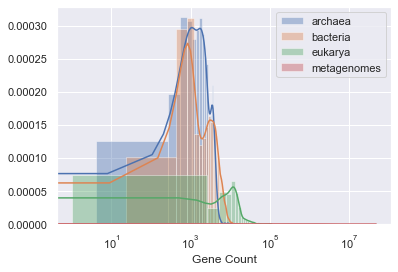

In [20]:
sns.distplot(archaea_df['Gene Count'], bins=40, label='archaea')
sns.distplot(bacteria_df['Gene Count'], bins=40, label='bacteria')
sns.distplot(eukarya_df['Gene Count'], bins=40, label='eukarya')
sns.distplot(metagenome_df['Gene Count'], bins=40, label='metagenomes')
plt.legend(loc='best')
plt.xscale('log')
plt.show()

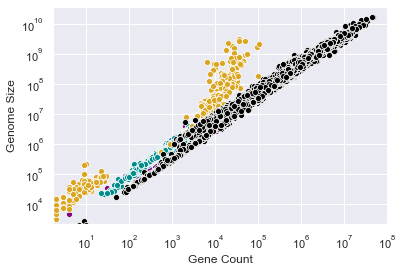

In [21]:
sns.scatterplot(archaea_df['Gene Count'], archaea_df['Genome Size'], color='purple')
sns.scatterplot(bacteria_df['Gene Count'], bacteria_df['Genome Size'], color='darkcyan')
sns.scatterplot(eukarya_df['Gene Count'], eukarya_df['Genome Size'], color='goldenrod')
sns.scatterplot(metagenome_df['Gene Count'], metagenome_df['Genome Size'], color='black')
plt.xscale('log')
plt.yscale('log')

In [22]:
def lin_regress(determiner, x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slope = round(slope, 6)
    intercept = round(intercept,2)
    std_err = round(std_err,2)
    return slope, intercept, std_err

In [23]:
archaea_slope, archaea_intercept, archaea_std_err = lin_regress('eukarya', archaea_df['Genome Size'],
                                                                archaea_df['Gene Count'])
bacteria_slope, bacteria_intercept, bacteria_std_err = lin_regress('eukarya', bacteria_df['Genome Size'],
                                                                   bacteria_df['Gene Count'])
eukarya_slope, eukarya_intercept, eukarya_std_err = lin_regress('eukarya', eukarya_df['Genome Size'],
                                                                eukarya_df['Gene Count'])
metagenome_slope, metagenome_intercept, metagenome_std_err = lin_regress('eukarya', metagenome_df['Genome Size'],
                                                                metagenome_df['Gene Count'])


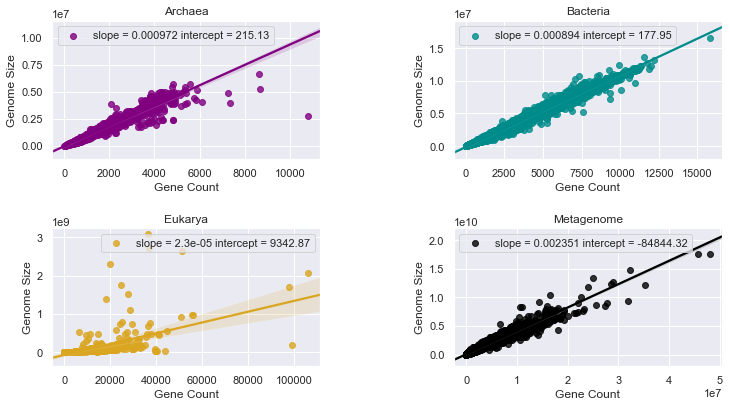

In [24]:
fig, ax = plt.subplots(figsize=(12,6), ncols=2, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

ax[0][0].set_title("Archaea")
ax[0][1].set_title("Bacteria")
ax[1][0].set_title("Eukarya")
ax[1][1].set_title("Metagenome")


sns.regplot(archaea_df['Gene Count'], archaea_df['Genome Size'], color='purple', ax=ax[0][0],
           label='slope = {} intercept = {}'.format(archaea_slope, archaea_intercept))
sns.regplot(bacteria_df['Gene Count'], bacteria_df['Genome Size'], color='darkcyan', ax=ax[0][1],
           label='slope = {} intercept = {}'.format(bacteria_slope, bacteria_intercept))
sns.regplot(eukarya_df['Gene Count'], eukarya_df['Genome Size'], color='goldenrod', ax=ax[1][0],
           label='slope = {} intercept = {}'.format(eukarya_slope, eukarya_intercept))
sns.regplot(metagenome_df['Gene Count'], metagenome_df['Genome Size'], color='black', ax=ax[1][1],
           label='slope = {} intercept = {}'.format(metagenome_slope, metagenome_intercept))

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

plt.savefig('genecount_genomesize_alldomains_regplot')

In [25]:
archaea_genomesize_mean = np.mean(archaea_df['Genome Size'])
archaea_genomesize_std = np.std(archaea_df['Genome Size'])

bacteria_genomesize_mean = np.mean(bacteria_df['Genome Size'])
bacteria_genomesize_std = np.std(bacteria_df['Genome Size'])

eukarya_genomesize_mean = np.mean(eukarya_df['Genome Size'])
eukarya_genomesize_std = np.std(eukarya_df['Genome Size'])

metagenome_genomesize_mean = np.mean(metagenome_df['Genome Size'])
metagenome_genomesize_std = np.std(metagenome_df['Genome Size'])

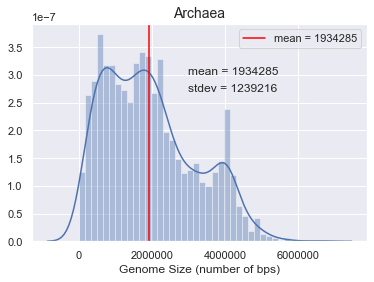

In [26]:
sns.distplot(archaea_df['Genome Size'], bins=40)
plt.axvline(archaea_genomesize_mean, color='red', label='mean = {}'.format(round(archaea_genomesize_mean),2))
plt.xlabel('Genome Size (number of bps)')
plt.text(3000000, 0.0000003, 'mean = {}'.format(round(archaea_genomesize_mean),2))
plt.text(3000000, 0.00000027, 'stdev = {}'.format(round(archaea_genomesize_std),2))
plt.title('Archaea', fontsize=14)
plt.legend(loc='best')
plt.show()

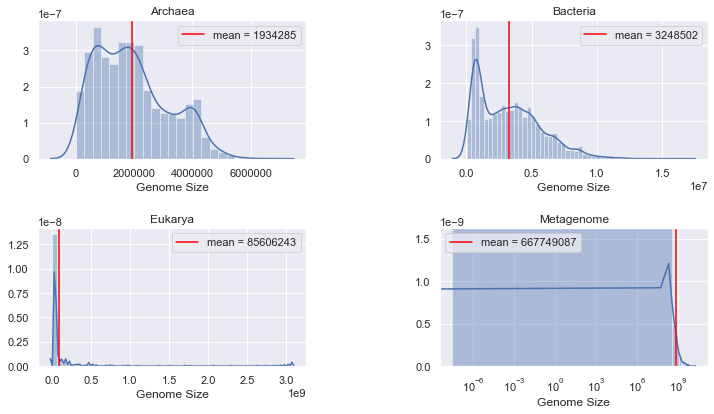

In [27]:
fig, ax = plt.subplots(figsize=(12,6), ncols=2, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

ax[0][0].set_title("Archaea")
ax[0][1].set_title("Bacteria")
ax[1][0].set_title("Eukarya")
ax[1][1].set_title("Metagenome")

sns.distplot(archaea_df['Genome Size'], kde = True, ax=ax[0][0])
ax[0][0].axvline(archaea_genomesize_mean, color='red', label='mean = {}'.format(round(archaea_genomesize_mean),2))
ax[0][0].legend(loc='best')

sns.distplot(bacteria_df['Genome Size'], kde = True, ax=ax[0][1])
ax[0][1].axvline(bacteria_genomesize_mean, color='red', label='mean = {}'.format(round(bacteria_genomesize_mean),2))
ax[0][1].legend(loc='best')

sns.distplot(eukarya_df['Genome Size'], kde = True, ax=ax[1][0])
ax[1][0].axvline(eukarya_genomesize_mean, color='red', label='mean = {}'.format(round(eukarya_genomesize_mean),2))
ax[1][0].legend(loc='best')

sns.distplot(metagenome_df['Genome Size'], kde = True, ax=ax[1][1])
ax[1][1].axvline(metagenome_genomesize_mean, color='red', label='mean = {}'.format(round(metagenome_genomesize_mean),2))
ax[1][1].legend(loc='best')
ax[1][1].set_xscale('log')




NameError: name 'df' is not defined

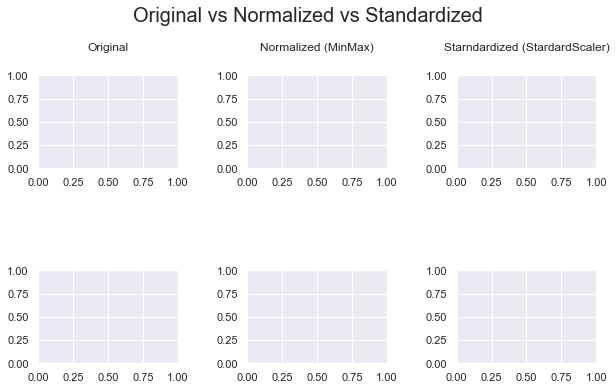

In [28]:
##
# Create a figure space matrix consisting of 3 columns and 2 rows
#
# Here is a useful template to use for working with subplots.
#
##################################################################
fig, ax = plt.subplots(figsize=(10,5), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  1.1    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.2

plt.suptitle("Original vs Normalized vs Standardized", y = 1.09, fontsize=20)

### Bathrooms
ax[0][0].set_title("Original",                    y = y_title_margin)
ax[0][1].set_title("Normalized (MinMax)",         y = y_title_margin)
ax[0][2].set_title("Starndardized (StardardScaler)", y = y_title_margin)

sns.distplot(df['bathrooms'],        kde = False, ax=ax[0][0])
sns.distplot(df['norm_bathrooms'],   kde = False, ax=ax[0][1])
sns.distplot(df['stand_bathrooms'],  kde = False, ax=ax[0][2])

# Set all labels on the row axis of subplots for bathroom data to "bathrooms"
[ax[0][i].set_xlabel("bathrooms") for i in range(0, 3)]

### Square feet
ax[1][0].set_title("Original",                  y = y_title_margin)
ax[1][1].set_title("Normalized (MinMax)",       y = y_title_margin)
ax[1][2].set_title("Standardized (StandardScaler)", y=y_title_margin)

sns.distplot(df['square_feet'],      kde = False, ax=ax[1][0])
sns.distplot(df['norm_square_feet'], kde = False, ax=ax[1][1])
sns.distplot(df['stand_square_feet'],kde = False, ax=ax[1][2])

# Set all labels on the row axis of subplots for square_feet data to "square_feet"
[ax[1][i].set_xlabel("square_feet") for i in range(0, 3)]

In [ ]:
lens = [len(archaea_df), len(bacteria_df), len(eukarya_df), len(metagenome_df)]
names = ['archaea', 'bacteria', 'eukarya', 'metagenomes']

In [ ]:
ax = sns.barplot(x=names, y=lens)
ax.set_title('Number of Genomes in Domain', fontsize=12)

In [ ]:
mean_genomesizes = [archaea_genomesize_mean, bacteria_genomesize_mean, eukarya_genomesize_mean,
                   metagenome_genomesize_mean]

In [ ]:
ax = sns.barplot(x=names, y=mean_genomesizes)
ax.set_title('Number of Genomes in Domain', fontsize=12)

In [ ]:
plt.plot(archaea_df['Genome Size'], 'ko')
plt.plot(bacteria_df['Genome Size'], 'bo')
plt.plot(eukarya_df['Genome Size'], 'ro')
plt.plot(metagenome_df['Genome Size'], 'go')


In [ ]:
sns.distplot(archaea_df['Genome Size'], bins=40)
plt.title('Archaea', fontsize=14)
plt.xscale('log')
plt.show()

sns.distplot(bacteria_df['Genome Size'])
plt.title('Bacteria', fontsize=14)
#plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.xscale('log')
plt.show()

sns.distplot(eukarya_df['Genome Size'], bins=40)
plt.title('Eukarya', fontsize=14)
#plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.xscale('log')
plt.show()

sns.distplot(metagenome_df['Genome Size'], bins=40)
plt.title('Metagenome', fontsize=14)
#plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.xscale('log')
plt.show()